# PCA and Clustering Analysis on Wine Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
import os 
os.environ['OMP_NUM_THREADS'] = '1'

# Load dataset
data = pd.read_csv('wine.csv')
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Task 1: Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


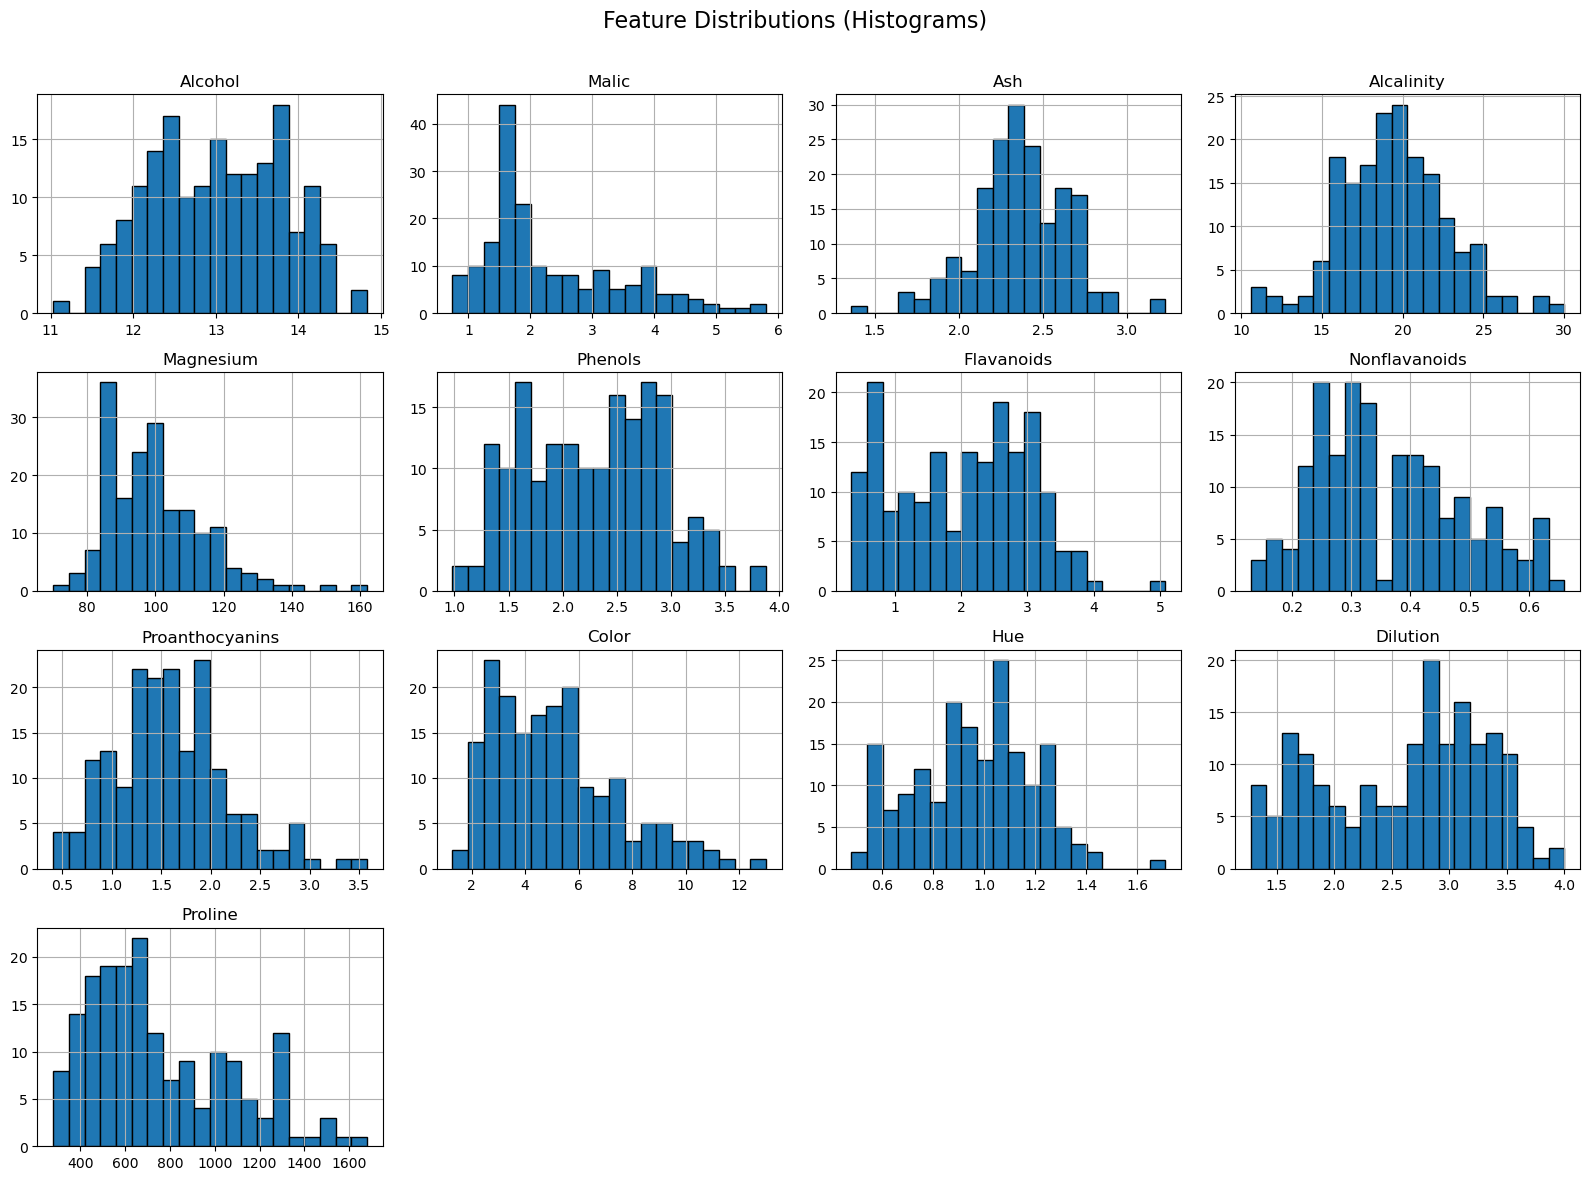

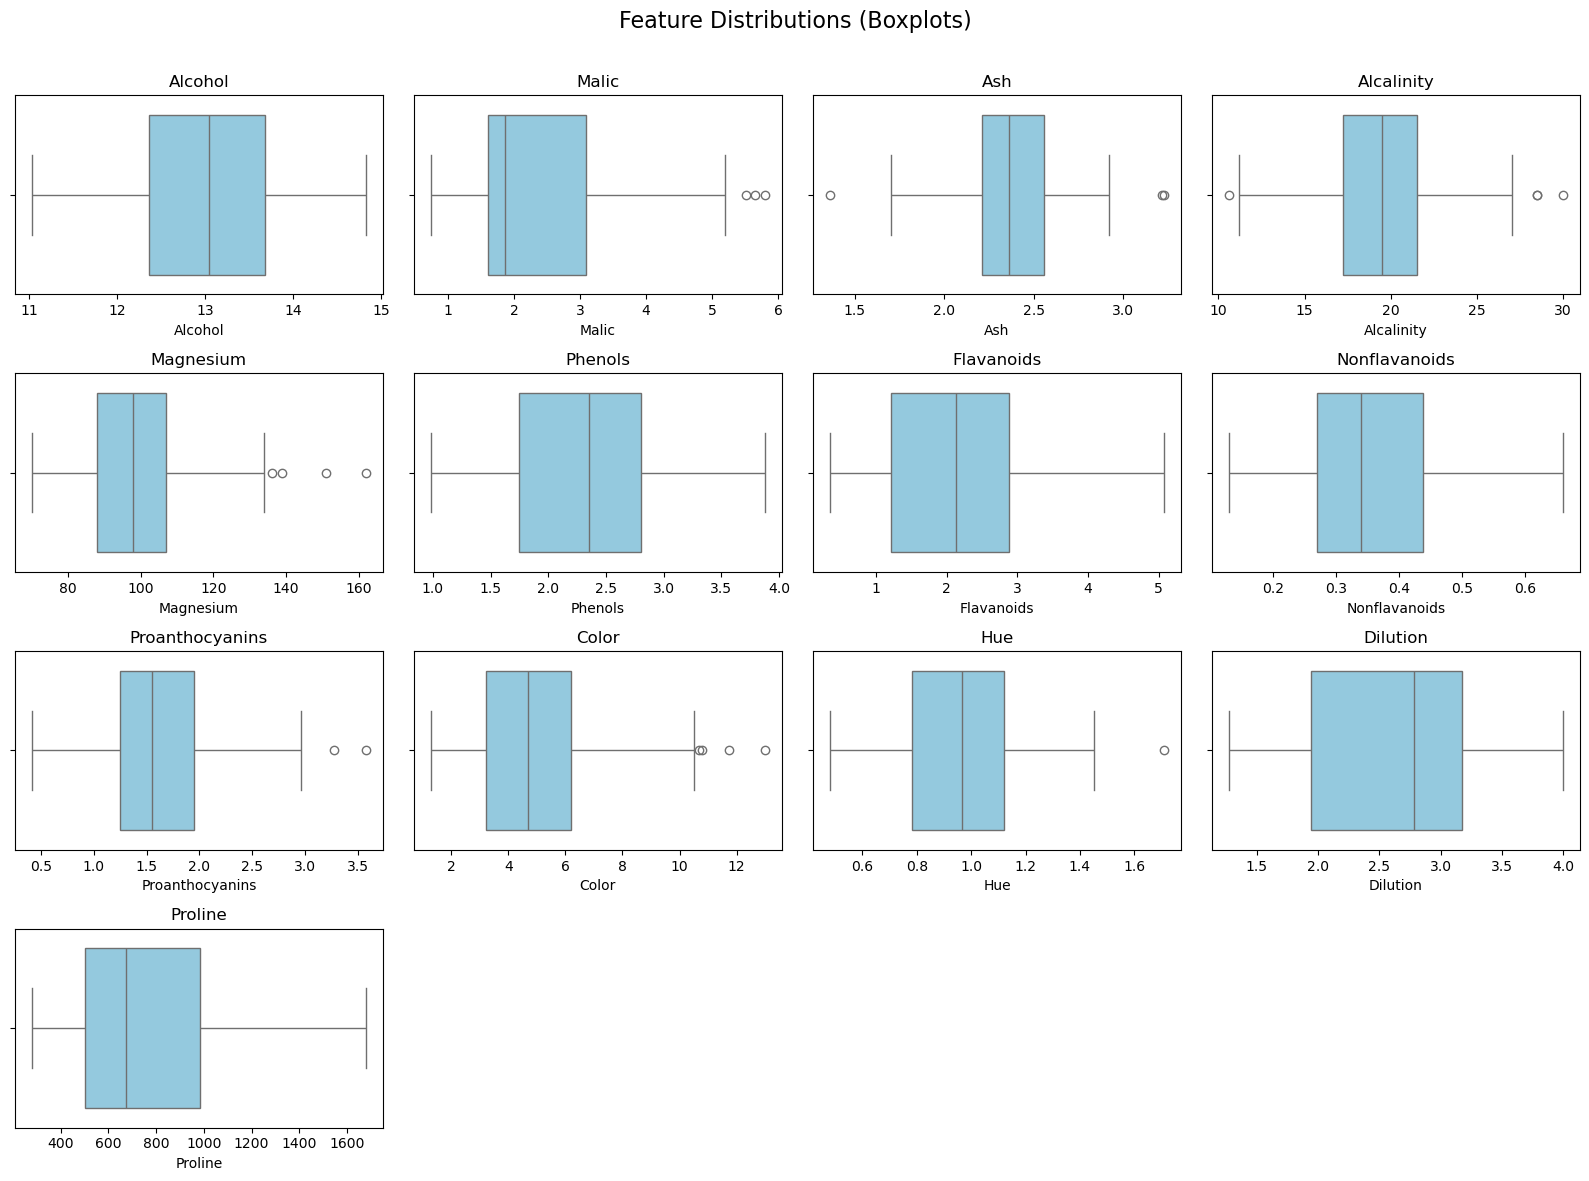

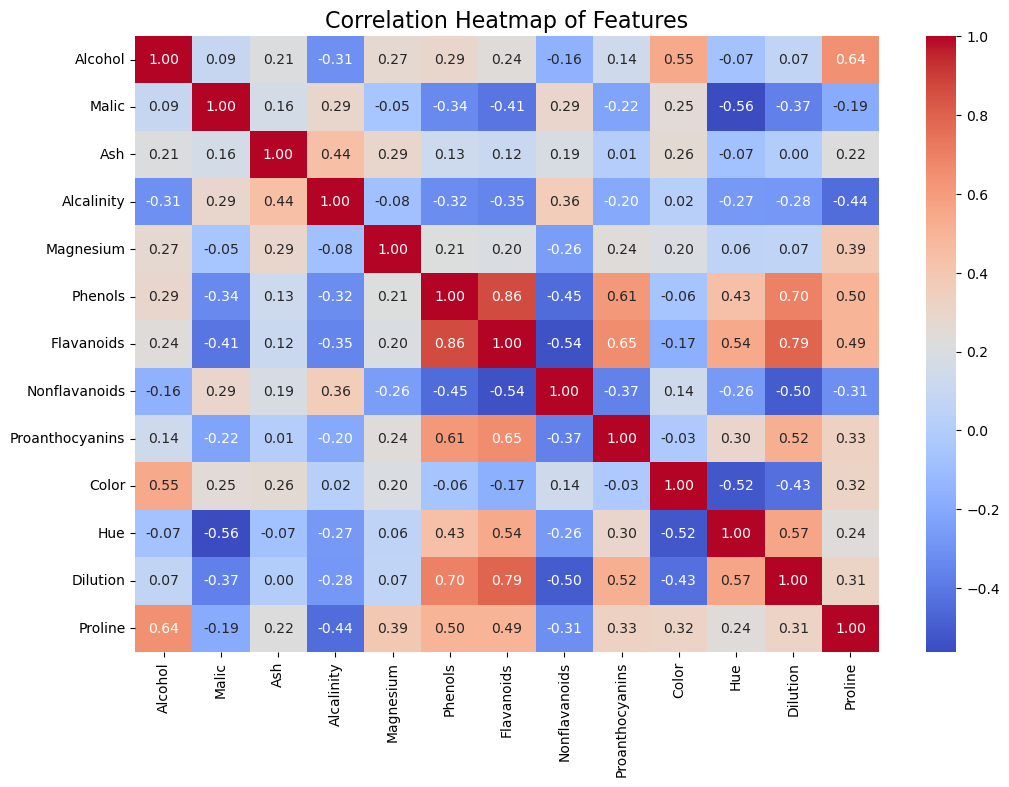

In [2]:
print(data.info())
display(data.describe())

# Histograms
data.drop(columns='Type').hist(bins=20, figsize=(16, 12), edgecolor='black')
plt.suptitle('Feature Distributions (Histograms)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Boxplots
plt.figure(figsize=(16, 12))
for idx, col in enumerate(data.columns[1:], 1):
    plt.subplot(4, 4, idx)
    sns.boxplot(x=data[col], color='skyblue')
    plt.title(col)
plt.suptitle('Feature Distributions (Boxplots)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.drop(columns='Type').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.show()

## Task 2: PCA (Dimensionality Reduction)

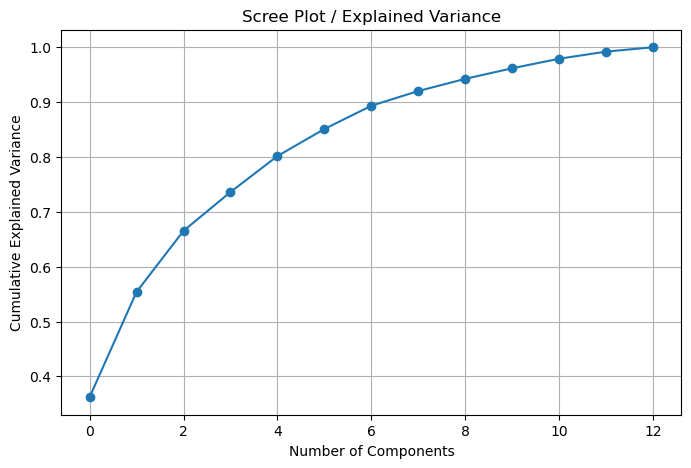

,PC1,PC2,Type
0,3.316751,1.443463,1
1,2.209465,-0.333393,1
2,2.516740,1.031151,1
3,3.757066,2.756372,1
4,1.008908,0.869831,1


In [3]:
# Standardize features
features = data.drop(columns='Type')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_features)

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot / Explained Variance')
plt.grid(True)
plt.show()

# Choose first n components (e.g., 2 for visualization)
pca_2 = PCA(n_components=2)
pca_2_data = pca_2.fit_transform(scaled_features)
pca_df = pd.DataFrame(pca_2_data, columns=['PC1', 'PC2'])
pca_df['Type'] = data['Type']
pca_df.head()

## Task 3: Clustering on Original Data

Silhouette Score (Original Data): 0.285
Davies-Bouldin Index (Original Data): 1.389


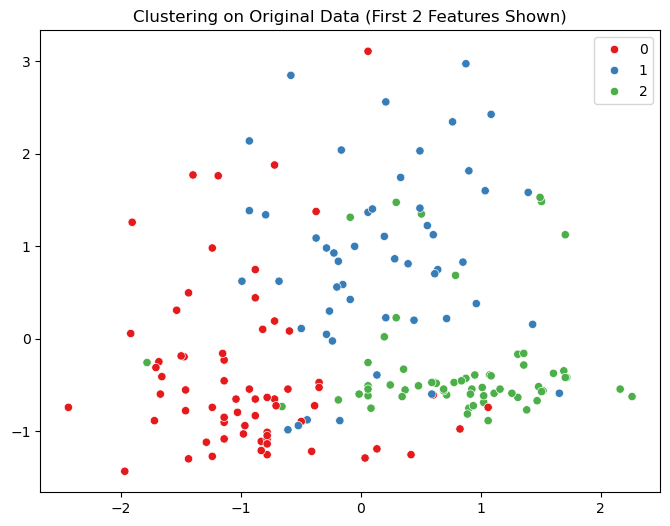

In [4]:
# KMeans on original data
kmeans_orig = KMeans(n_clusters=3, random_state=42)
labels_orig = kmeans_orig.fit_predict(scaled_features)

# Metrics
sil_orig = silhouette_score(scaled_features, labels_orig)
db_orig = davies_bouldin_score(scaled_features, labels_orig)
print(f'Silhouette Score (Original Data): {sil_orig:.3f}')
print(f'Davies-Bouldin Index (Original Data): {db_orig:.3f}')

# Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=scaled_features[:,0], y=scaled_features[:,1], hue=labels_orig, palette='Set1')
plt.title('Clustering on Original Data (First 2 Features Shown)')
plt.show()

## Task 4: Clustering on PCA-Transformed Data

Silhouette Score (PCA Data): 0.560
Davies-Bouldin Index (PCA Data): 0.598


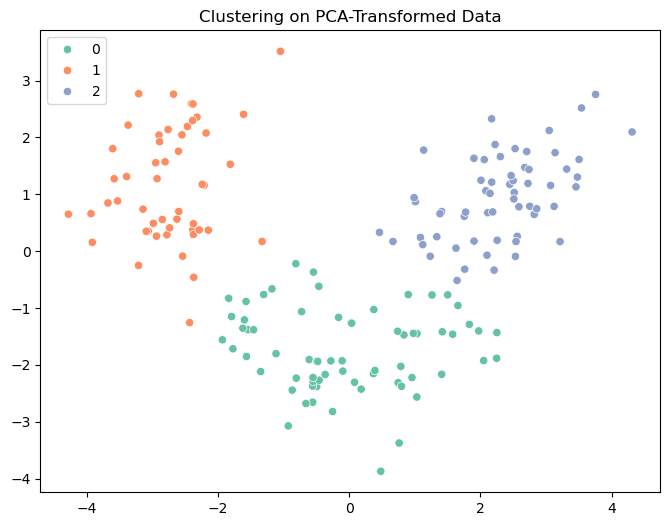

In [5]:
# KMeans on PCA data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(pca_2_data)

# Metrics
sil_pca = silhouette_score(pca_2_data, labels_pca)
db_pca = davies_bouldin_score(pca_2_data, labels_pca)
print(f'Silhouette Score (PCA Data): {sil_pca:.3f}')
print(f'Davies-Bouldin Index (PCA Data): {db_pca:.3f}')

# Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_2_data[:,0], y=pca_2_data[:,1], hue=labels_pca, palette='Set2')
plt.title('Clustering on PCA-Transformed Data')
plt.show()

## Task 5: Comparison and Analysis

In [6]:
print('Comparison of Clustering Results:')
print(f'Silhouette Score Original: {sil_orig:.3f}')
print(f'Silhouette Score PCA: {sil_pca:.3f}')
print(f'Davies-Bouldin Original: {db_orig:.3f}')
print(f'Davies-Bouldin PCA: {db_pca:.3f}')

Comparison of Clustering Results:
Silhouette Score Original: 0.285
Silhouette Score PCA: 0.560
Davies-Bouldin Original: 1.389
Davies-Bouldin PCA: 0.598


## Task 6: Conclusion and Insights
- PCA helps reduce dimensions while retaining most of the variance.
- Clustering on PCA-transformed data may simplify interpretation and improve performance.